In [1]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak

from sklearn.preprocessing import normalize as norm

Welcome to JupyROOT 6.30/04


In [2]:
FILE_PATH = "../Dati/Run_Na_Trigger_512_CFD_20_GATE_300_Data_5_21_2024_Ascii.root" #Relative file path
file1 = uproot.open(FILE_PATH)
FILE_PATH = "../Dati/Run_Na_Trigger_512_CFD_20_GATE_300_Data_5_21_2024_Ascii_0001.root"
file2 = uproot.open(FILE_PATH)

baselines = np.concatenate( (file1["tree"]["base"].array()[:-1], file2["tree"]["base"].array()[1:]) , axis=0 ) 
charges = np.concatenate( (file1["tree"]["charge"].array()[:-1], file2["tree"]["charge"].array()[1:]), axis=0 )
amp = np.concatenate( (file1["tree"]["amp"].array()[:-1], file2["tree"]["amp"].array()[1:] ), axis=0 )
lead_edge = np.concatenate( (file1["tree"]["letime"].array()[:-1], file2["tree"]["letime"].array()[1:]), axis=0 )
t_edge = np.concatenate( (file1["tree"]["tetime"].array()[:-1], file2["tree"]["tetime"].array()[1:]), axis=0 )
channel= np.concatenate( (file1["tree"]["ch"].array()[:-1], file2["tree"]["ch"].array()[1:]), axis=0 )
waveform = np.concatenate( (file1["tree"]["pshape"].array()[:-1], file2["tree"]["pshape"].array()[1:] ), axis=0 )

In [25]:
print(np.array(waveform[1]).shape)

(12, 1024)


[149.44552011  12.26618757 121.28274459  -0.18172448]
121.28274459059158 3.5734902833020596


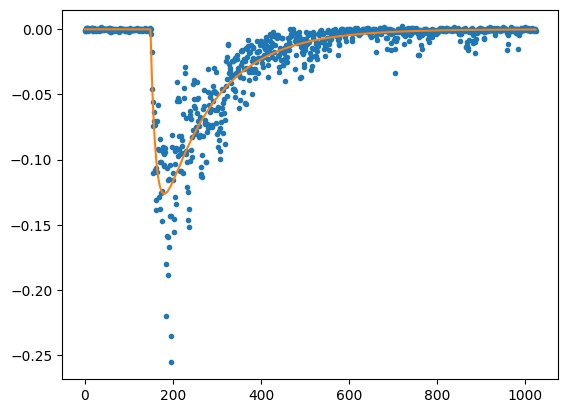

In [32]:
def signal(t, t0, tr, td, amplitude):
  a=np.heaviside(t-t0, 1)*amplitude*( -np.exp(-(t-t0)/tr) +  np.exp(-(t-t0)/td)  )
  return a

sample=1
channel=3
x=np.arange(1024)
y=waveform[sample][channel]
plt.plot(x, y, '.')


from scipy.optimize import curve_fit
params, covs, i, m, ier = curve_fit(signal, x, y, p0=[200, 30, 300, -0.25], full_output=True)
print(params)
plt.plot(x, signal(x, params[0], params[1], params[2], params[3]))
print(params[2], np.sqrt(covs[2][2]) )